<img src="https://raw.githubusercontent.com/ryanedw/COMPSS-202-SU24/main/Images/UCB-macss.jpg" width="120" align="right"/>
<h1>COMPSS 202 Class XX</h1>

<h2>Sampling and the Election of 1936</h2>

According to the [American Presidency Project at UC Santa Barbara](https://www.presidency.ucsb.edu/statistics/elections/1936), a total of 45,646,991 votes were cast in the Presidential election of 1936, of which 27,750,866 were for FDR and 16,679,683 were for Alfred M. Landon.

In [1]:
16679683 + 27750866

[1] 44430549

In [2]:
fdr = 27750866
landon = 16679683

In [3]:
total2 = fdr + landon
fdrshare = fdr/total2

In [4]:
fdrshare

[1] 0.6245898

ChatGPT seems to think that `raw` datatypes are the best way to minimize storage needs in __R__.

In [5]:
# This crashes the kernel
# Let's instead construct using as.raw
#numeric_vector <- c(rep(1,fdr), rep(0,landon))

In [6]:
# Creates 0's and 1's and minimizes memory usage
v36_byte <- as.raw( c(rep(1,fdr), rep(0,landon)) )

# Creates a numeric vector, in which R can measure means, etc.
v36 <- as.numeric(v36_byte)

In [7]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,651606,34.8,1440355,77.0,1440355,77.0
Vcells,51194979,390.6,110179548,840.7,95690661,730.1


In [8]:
# If desired, a data frame
#df <- data.frame(votes = numeric_vector)

In [9]:
mean(v36)

[1] 0.6245898

In [45]:
set.seed(20240819)

In [46]:
n = 1000

v36_1 <- sample(v36, size = n, replace = FALSE)

v36_1_mean = mean(v36_1)
v36_1_se_mean = sqrt( v36_1_mean * (1 - v36_1_mean) / n)

v36_1_mean
v36_1_se_mean

[1] 0.624

[1] 0.01531744

In [47]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,667627,35.7,1440355,77.0,1440355,77.0
Vcells,51332819,391.7,110179548,840.7,95690661,730.1


In [67]:
# initialize

draws = 100
#draws = 10

v36sample_mat = matrix(0, nrow = 1000, ncol = draws)
v36sample_mean = matrix(0, nrow = 1, ncol = draws)
v36sample_se_mean = matrix(0, nrow = 1, ncol = draws)

In [68]:
set.seed(20240819)

In [69]:
for (i in 1:draws) {
  v36sample_mat[,i] = sample(v36, size = n, replace = FALSE)

  v36sample_mean[i] = mean(v36sample_mat[,i])

# Ooops, this is the SE for the mean of continuous data
#    v36sample_se_mean[i] = sd(v36sample_mat[,i])/sqrt(n)

  v36sample_se_mean[i] = sqrt( v36sample_mean[i] * (1 - v36sample_mean[i]) / n )
    
}

In [70]:
dim(v36sample_mat)
dim(v36sample_mean)
dim(v36sample_se_mean)


[1] 1000  100

[1]   1 100

[1]   1 100

In [71]:
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,668693,35.8,1440355,77.0,1440355,77.0
Vcells,51335207,391.7,110179548,840.7,95690661,730.1


In [72]:
v36sample_mean

0.624,0.639,0.609,0.625,0.61,0.62,0.636,0.633,0.617,0.645,⋯,0.635,0.61,0.615,0.599,0.63,0.636,0.636,0.624,0.6,0.647


<hr>

I think all this is working, but the graphics are weird. I can't get R to show three series (mean, hi, lo) aligned above the element. 

<hr>


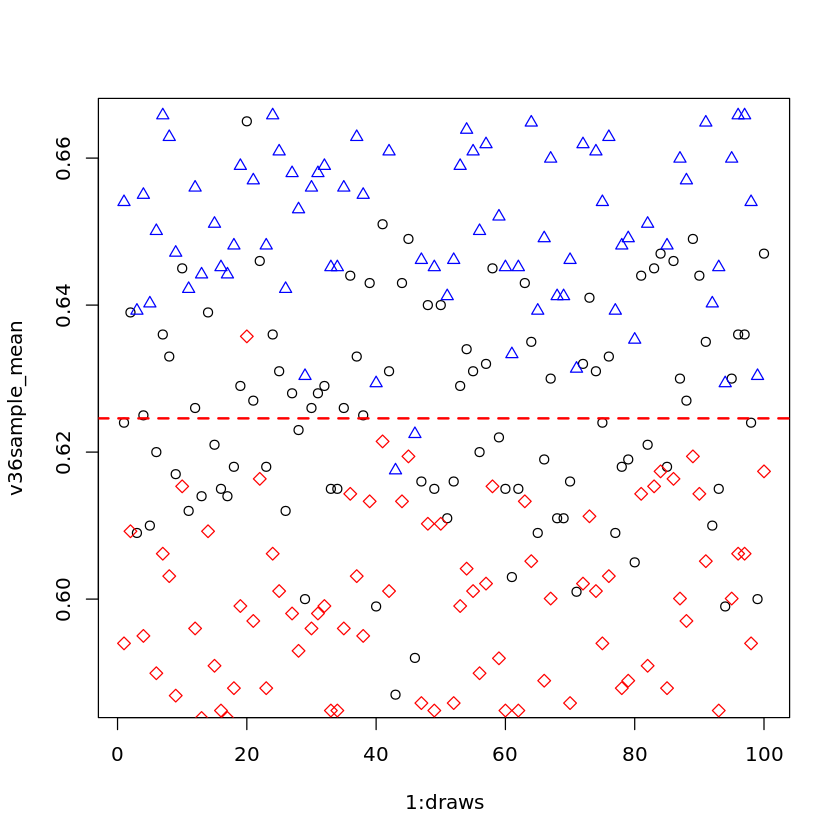

In [73]:
plot(1:draws, v36sample_mean)
points(1:draws, v36sample_mean + 1.96*v36sample_se_mean,
      col = "blue", pch = 2)
points(1:draws, v36sample_mean - 1.96*v36sample_se_mean,
      col = "red", pch = 5)
abline(h = fdrshare, col = "red", lty = 2, lwd = 2)

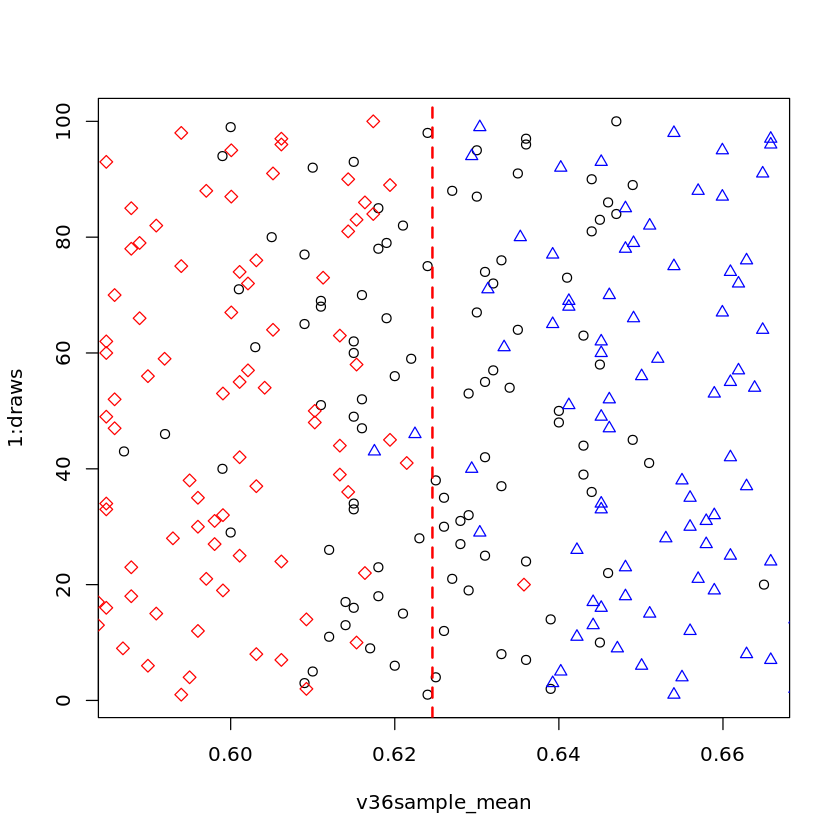

In [74]:
plot(v36sample_mean, 1:draws)
points(v36sample_mean + 1.96*v36sample_se_mean, 1:draws,
      col = "blue", pch = 2)
points(v36sample_mean - 1.96*v36sample_se_mean, 1:draws,
      col = "red", pch = 5)
abline(v = fdrshare, col = "red", lty = 2, lwd = 2)

In [75]:
v36sample_hi = v36sample_mean + 1.96*v36sample_se_mean

v36sample_lo = v36sample_mean - 1.96*v36sample_se_mean


In [76]:
min(v36sample_hi)

[1] 0.6175176

In [80]:
# Place contents into a data frame
v36sample_df = data.frame(t(v36sample_lo),
                t(v36sample_mean), 
                t(v36sample_hi))

v36sample_df_sort = v36sample_df[order(df$t.v36sample_mean), ]
head(v36sample_df_sort, n = 5)
tail(v36sample_df_sort, n = 5)

,t.v36sample_lo.,t.v36sample_mean.,t.v36sample_hi.
,<dbl>,<dbl>,<dbl>
43,0.5564824,0.587,0.6175176
46,0.5615388,0.592,0.6224612
40,0.5686232,0.599,0.6293768
94,0.5686232,0.599,0.6293768
29,0.5696358,0.600,0.6303642


,t.v36sample_lo.,t.v36sample_mean.,t.v36sample_hi.
,<dbl>,<dbl>,<dbl>
100,0.6173793,0.647,0.6766207
45,0.6194177,0.649,0.6785823
89,0.6194177,0.649,0.6785823
41,0.6214567,0.651,0.6805433
20,0.6357457,0.665,0.6942543


In [65]:
fdrshare

[1] 0.6245898

Here, we see 4 samples out of 100 in which the 95% confidence interval around the sample proportion does not include the true population mean. Two samples shown in the head are too low, and two shown in the tail are too high.